# Random Forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('bank_oversample_new.csv')

In [4]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,result
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [5]:
df.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


In [8]:
df.shape

(8000, 43)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,result
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,41.408250,1474.023500,15.553750,388.201625,2.43375,49.347750,0.662625,0.128125,0.021000,0.014000,...,0.070000,0.007625,0.192250,0.050875,0.011750,0.007250,0.027875,0.043625,0.703250,0.500000
std,10.772306,2723.892551,7.663596,345.412893,2.60225,102.116466,1.654659,0.334250,0.143393,0.117498,...,0.255163,0.086993,0.394093,0.219756,0.107765,0.084843,0.164625,0.204272,0.456854,0.500031
min,19.000000,-3313.000000,1.000000,4.000000,1.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,102.000000,9.000000,147.000000,1.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,558.000000,16.000000,271.000000,2.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,48.000000,1790.000000,21.000000,530.250000,3.00000,51.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.00000,871.000000,25.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6400, 42), (1600, 42), (6400,), (1600,))

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Scale free dataset for a feature.

In [12]:

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
# The number of features to consider when looking for the best split:

# If int, then consider max_features features at each split.

# If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.

# If “auto”, then max_features=sqrt(n_features).

# If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

# If “log2”, then max_features=log2(n_features).

# If None, then max_features=n_features.
# 0.3 : it will allow the RF to take 30% of features in each run to be considered

model_rf = RandomForestClassifier(n_estimators=20, criterion='gini', max_features=0.2)


In [13]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, n_estimators=20)

In [15]:
y_pred = model_rf.predict(X_test)
y_pred_prob = model_rf.predict_proba(X_test)

In [16]:
import innomatics

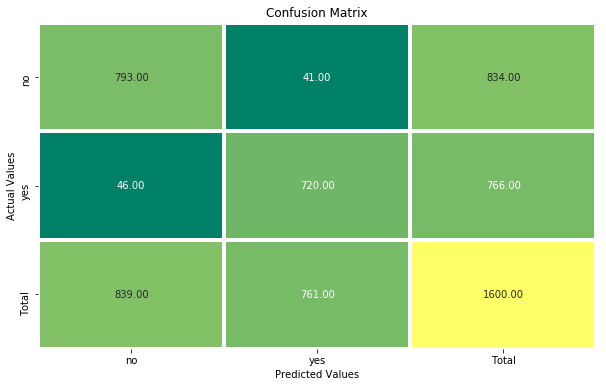

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       834
           1       0.95      0.94      0.94       766

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600


************************************Kappa Score************************************


Kappa Score = 0.8910242157971047

******************************Area Under Curve Score******************************


AUC Score = 0.9453935546080108
Number of probabilities to build ROC = 22


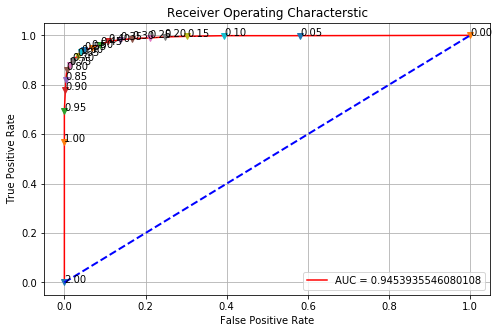

In [17]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1],
                                 label=['no','yes'],verbose=True)

In [11]:
# Precision - % of prediction was correctly predicted by model  (Accuracy of +ve prediction)
# Recall - % of +ve case model has catch   (Fraction of +ve correctly identified)
# F1 score - % of +ve prediction correctly.
# Spport - Identifiying balance/Im balance from training data
#     739     42
#      63     756

# Observed agreement = (739 + 756) / 1600 = 0.93
# Chance agreement   = probability of randomly saying yes (P_yes) + probability of randomly saying no (P_no)
# Pyes              = (739 + 42) / 1600 * (739 + 42) / 1600 = 0.26
# Pno               = (756 + 63) / 1600 * (756 + 63) / 1600 = 0.23
# Chance agreement   = 0.23 + 0.26 = 0.49

# kappa = 1 - (1 - 0.93) / (1 - 0.49) = 0.86


# <0 No agreement
# 0 — .20 Slight
# .21 — .40 Fair
# .41 — .60 Moderate
# .61 — .80 Substantial
# .81–1.0 Perfect


# True Positive Rate = True Positives / (True Positives + False Negatives)
# Sensitivity = True Positives / (True Positives + False Negatives)

# Specificity = True Negatives / (True Negatives + False Positives)
# False Positive Rate = 1 - Specificity

In [18]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [19]:
model_tune = RandomForestClassifier()

In [20]:
tune_parameter = [{'n_estimators':[10,20,30],
                   'criterion':['gini','entropy'],
                   'max_depth':[10,15],
                   'max_features':['sqrt','log2']}]

In [21]:
clf = GridSearchCV(model_tune, param_grid=tune_parameter, cv=5, scoring='roc_auc')

In [22]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 15],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [10, 20, 30]}],
             scoring='roc_auc')

In [23]:
clf.best_params_, clf.best_score_

({'criterion': 'gini',
  'max_depth': 15,
  'max_features': 'sqrt',
  'n_estimators': 30},
 0.9849819469425476)

In [24]:
model_final = RandomForestClassifier(n_estimators=30,max_depth=15 ,criterion='gini', max_features='sqrt')

In [26]:
model_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=30)

In [27]:
y_pred = model_final.predict(X_test)
y_prob = model_final.predict_proba(X_test)

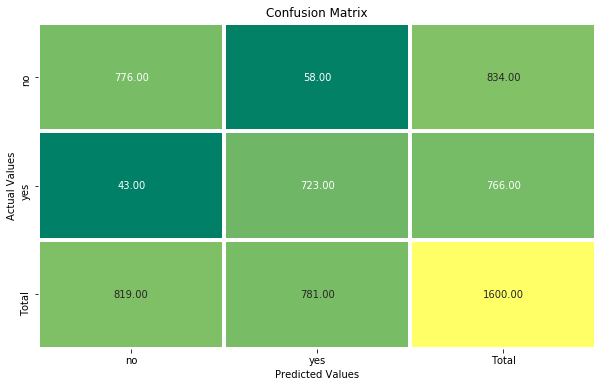

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       834
           1       0.93      0.94      0.93       766

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600


************************************Kappa Score************************************


Kappa Score = 0.873622437648001

******************************Area Under Curve Score******************************


AUC Score = 0.9371599326283099
Number of probabilities to build ROC = 302


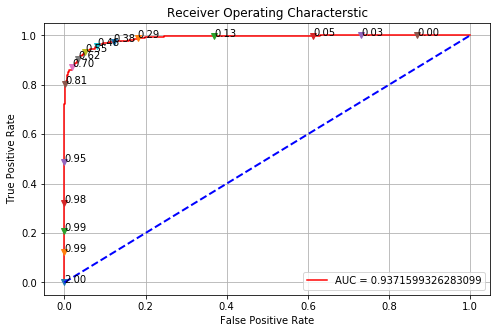

In [28]:
innomatics.classification_metric(y_test,y_pred,y_prob[:,1],
                                 label=['no','yes'],verbose=True,n=20)

In [29]:
features = pd.DataFrame()

In [33]:
features['Feature'] = X.columns

In [34]:
features.head()

,Feature
0,age
1,balance
2,day
3,duration
4,campaign


In [35]:
model_final.feature_importances_

array([0.03475025, 0.04972553, 0.03731065, 0.24324066, 0.02114941,
       0.04332749, 0.01780823, 0.03411665, 0.00460959, 0.00281359,
       0.02130617, 0.00419757, 0.00251207, 0.00783672, 0.00128736,
       0.02064129, 0.00347878, 0.00087894, 0.05242323, 0.02945083,
       0.02157324, 0.01422931, 0.00557846, 0.00101988, 0.05333908,
       0.02546062, 0.00481456, 0.05951826, 0.0258925 , 0.00083804,
       0.00692279, 0.00505251, 0.03002107, 0.01258017, 0.00243046,
       0.04076316, 0.01833786, 0.00238937, 0.00113524, 0.00601263,
       0.00459728, 0.02462852])

In [36]:
features['Support'] = model_final.feature_importances_

In [42]:
features[features['Feature'] == 'duration']

,Feature,Support
3,duration,0.243241


In [24]:
#features= pd.DataFrame()
features['Features']= X.columns
features['Support'] = model_final.feature_importances_

In [43]:
features.shape

(42, 2)

In [45]:
features.sort_values('Support',ascending=False,inplace=True)
features.set_index('Feature',inplace= True)

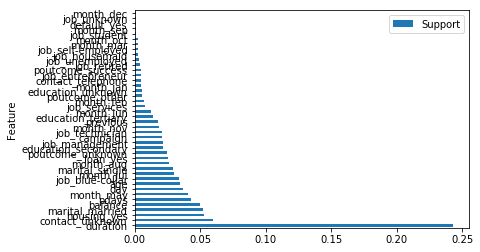

In [46]:
features.plot(kind='barh')
# Most important feature was duration

In [48]:
features.reset_index(inplace=True)

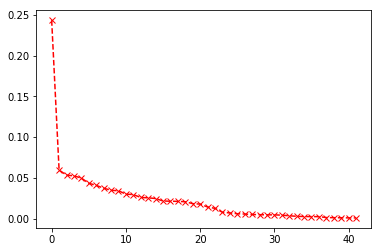

In [49]:
plt.plot(features['Support'],'rx--')

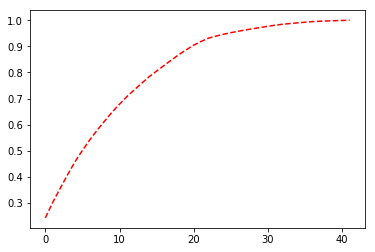

In [50]:
plt.plot(np.cumsum(features['Support']),'r--')